<a href="https://colab.research.google.com/github/sajla97k/NLP-Python/blob/main/Sentimental_analysis_using_nlp_ipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from wordcloud import WordCloud

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
D = pd.read_csv("/content/drive/MyDrive/text summarization/Reddit_Data.csv")

In [ ]:
D.head(2)

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1


In [ ]:
print(D['clean_comment'].value_counts())

                                                                                                                                                                                                                                                                                                                                                          115
yes                                                                                                                                                                                                                                                                                                                                                        12
source                                                                                                                                                                                                                                                                                                      

In [ ]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [ ]:
D.shape

(37249, 2)

In [ ]:
D.isna().any()

clean_comment     True
category         False
dtype: bool

In [ ]:
D.dropna()


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
D=D.fillna(method='bfill')


In [ ]:
D.isna().any()


clean_comment    False
category         False
dtype: bool

In [ ]:
text=D['clean_comment']
from nltk import TweetTokenizer
tk=TweetTokenizer()
text=text.apply(lambda x: tk.tokenize(x)).apply(lambda x:' '.join(x))
text

0        famili never tri explain still stare puzzl tim...
1        buddhism much lot compat christian especi cons...
2        serious say thing first get complex explain no...
3        learn want teach differ focu goal wrap paper b...
4        benefit may want read live buddha live christ ...
                               ...                        
37244                                                 jesu
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                   downvot karna tha par upvot hogaya
37247                                            haha nice
37248                               facebook work bjp cell
Name: clean_comment, Length: 37249, dtype: object

In [ ]:
text=text.str.replace('[^a-zA-Z0-9]+',' ') #the characters given in bracket is the data that should not be replaced . usually the given that is replaced but in this case it is not.
text

0        famili never tri explain still stare puzzl tim...
1        buddhism much lot compat christian especi cons...
2        serious say thing first get complex explain no...
3        learn want teach differ focu goal wrap paper b...
4        benefit may want read live buddha live christ ...
                               ...                        
37244                                                 jesu
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                   downvot karna tha par upvot hogaya
37247                                            haha nice
37248                               facebook work bjp cell
Name: clean_comment, Length: 37249, dtype: object

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
text=text.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
text

0        famili never tri explain still stare puzzl tim...
1        buddhism much lot compat christian especi cons...
2        serious say thing first get complex explain no...
3        learn want teach differ focu goal wrap paper b...
4        benefit may want read live buddha live christ ...
                               ...                        
37244                                                 jesu
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                   downvot karna tha par upvot hogaya
37247                                            haha nice
37248                               facebook work bjp cell
Name: clean_comment, Length: 37249, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
text=text.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x :' '.join(x))
text

0        famili never tri explain still stare puzzl tim...
1        buddhism much lot compat christian especi cons...
2        serious say thing first get complex explain no...
3        learn want teach differ focu goal wrap paper b...
4        benefit may want read live buddha live christ ...
                               ...                        
37244                                                 jesu
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                   downvot karna tha par upvot hogaya
37247                                            haha nice
37248                               facebook work bjp cell
Name: clean_comment, Length: 37249, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
text=text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
text

0        famili never tri explain still stare puzzl tim...
1        buddhism much lot compat christian especi cons...
2        serious say thing first get complex explain no...
3        learn want teach differ focu goal wrap paper b...
4        benefit may want read live buddha live christ ...
                               ...                        
37244                                                 jesu
37245    kya bhai pure saal chutiya banaya modi aur jab...
37246                   downvot karna tha par upvot hogaya
37247                                            haha nice
37248                               facebook work bjp cell
Name: clean_comment, Length: 37249, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data_vec=vec.fit_transform(text)
print(train_data_vec)

  (0, 11768)	0.20089737591116102
  (0, 1720)	0.21766772175756355
  (0, 11925)	0.11701215669573718
  (0, 3176)	0.1510496131409347
  (0, 2428)	0.2394968684887069
  (0, 114)	0.17314072292013888
  (0, 3850)	0.28122434719848843
  (0, 1840)	0.2136275845925602
  (0, 8635)	0.2519106351929831
  (0, 197)	0.2265984249572456
  (0, 2392)	0.12085874042265435
  (0, 8084)	0.26305127444573023
  (0, 2696)	0.2679554646698767
  (0, 11366)	0.2394968684887069
  (0, 6411)	0.1549270627131149
  (0, 6781)	0.09329781110407866
  (0, 12013)	0.22173360596966568
  (0, 9382)	0.27730427932558216
  (0, 11266)	0.26305127444573023
  (0, 11329)	0.1300854887860923
  (0, 4005)	0.1770909778404292
  (0, 12188)	0.13075075966113106
  (0, 7985)	0.1363634844847217
  (0, 4088)	0.15487033438436268
  (1, 3132)	0.07339818378097013
  :	:
  (37245, 5291)	0.2590425313223735
  (37245, 3435)	0.21490329594455637
  (37245, 5951)	0.23688788798144522
  (37245, 12270)	0.2175831505182456
  (37245, 10156)	0.4423390404470156
  (37245, 1289)	0.181

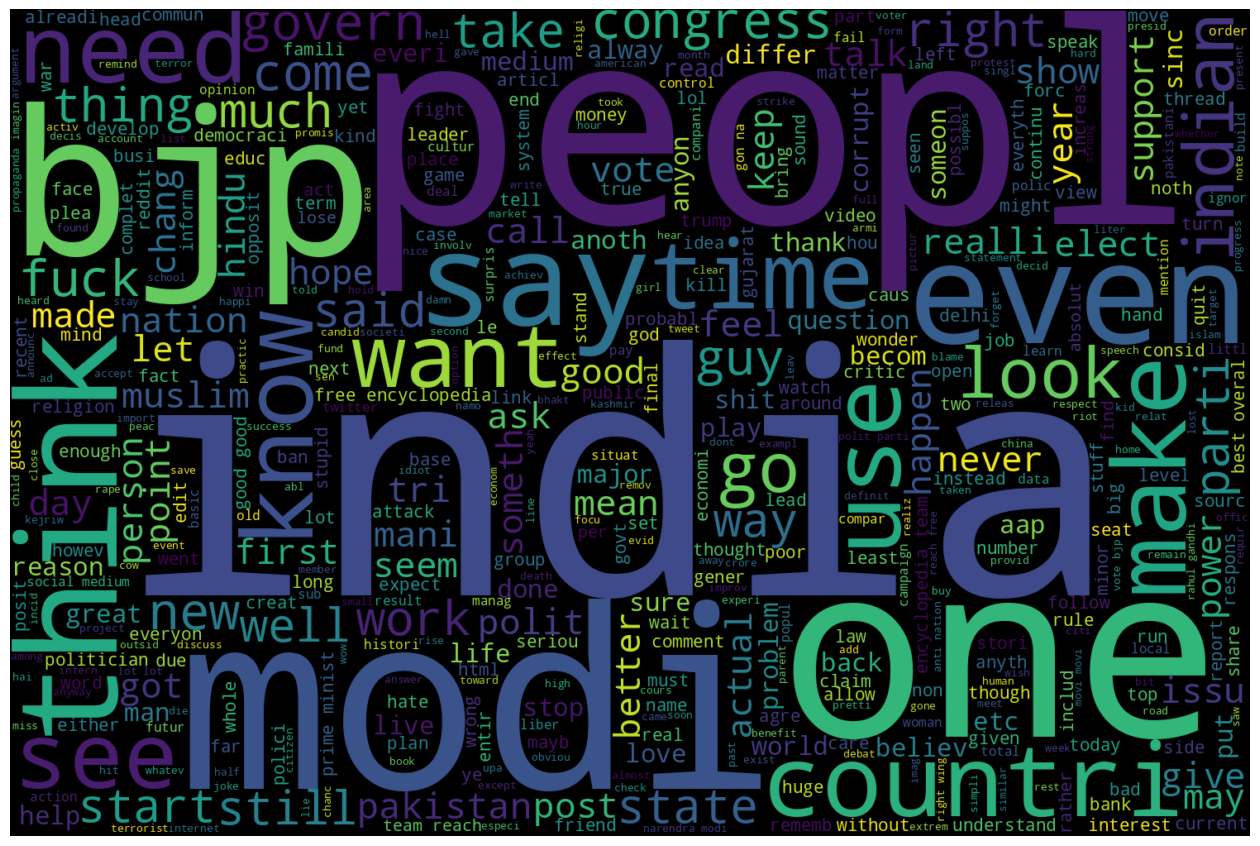

In [ ]:
plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color='black',max_words=500, width=1500, height=1000).generate( ' '.join(D['clean_comment']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
train_data_vec.shape


(37249, 13388)

In [ ]:
y=D['category'].values
y

array([ 1,  1, -1, ...,  0,  1,  0])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train_data_vec,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)


LogisticRegression()

In [ ]:
x_pred=model.predict(xtrain)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(x_pred,ytrain)
accuracy

0.8850296989831874

In [ ]:
x_test_pred=model.predict(xtest)
test_accuracy=accuracy_score(x_test_pred,ytest)
test_accuracy

0.8222818791946309